In [64]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix
from scipy import stats
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [65]:
def run_model(modelo, x_train, y_train, x_test, y_test):
    modelo.fit(x_train, y_train)

    try:
        prob_predict = modelo.predict_proba(x_test)
    except:
        # Modelo não aceita resultado em probabilidade
        prob_predict = '-'

    data_bom = np.sort(prob_predict)[:, 0]
    data_mau = np.sort(prob_predict)[:, 1]
    kstest = stats.ks_2samp(data_bom, data_mau)


    print(f'\n-------Resultados {modelo}-------\n')
    print(f'Métrica KS: {kstest}')
    print('\n')
    print('Confusion Matrix')
    fig, ax = plt.subplots(figsize=(7,7))
    matriz_confusao = ConfusionMatrixDisplay.from_estimator(modelo, x_test, y_test, normalize='true', display_labels=['Bom pagador','Mau pagador'],
                                                              ax=ax, cmap=plt.cm.Blues)
    ax.set_title('Matriz de confusão\nNormalizada', fontsize=16, fontweight='bold')
    ax.set_xlabel('Predição', fontsize=14)
    ax.set_ylabel('Classificação', fontsize=14)
    plt.grid(False)
    plt.show()

    predict = modelo.predict(x_test)
    print(f'\nClassification Report\n')
    print(classification_report(y_test, predict, zero_division=0))

    print('\nROC Curve\n')
    RocCurveDisplay.from_estimator(modelo, x_test, y_test)

In [66]:
df_train = pd.read_csv('../../dados/credit_score/df_train_clean.csv')
df_test = pd.read_csv('../../dados/credit_score/df_test_clean.csv')

SEED = 400

In [67]:
df_train

,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Idade,Anos_empregado,Tamanho_familia,Rendimento_anual,Grau_escolaridade,...,Ocupacao_Outro,Ocupacao_Pensionista,Ocupacao_RH,Ocupacao_Secretariado,Ocupacao_Segurança,Ocupacao_Servidor público,Ocupacao_Serviço privado,Ocupacao_TI,Ocupacao_Vendas,Risco_de_credito
0,0,1,0,0,0,0.854167,0.000000,0.142857,0.016667,1,...,0,1,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0.666667,0.069767,0.071429,0.404762,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0.500000,0.046512,0.071429,0.702381,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0.458333,0.139535,0.142857,0.226190,1,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0.250000,0.023256,0.071429,0.404762,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41755,0,1,0,0,0,0.345203,0.073535,0.112929,0.157023,2,...,0,0,0,0,0,0,0,0,0,1
41756,0,1,0,0,0,0.670816,0.130272,0.000000,0.523810,1,...,0,0,0,0,0,0,0,0,0,1
41757,0,1,0,0,0,0.626697,0.129612,0.071429,0.552117,1,...,0,0,0,0,0,0,0,0,0,1
41758,1,1,0,0,0,0.503887,0.262513,0.044190,0.614605,1,...,0,0,0,0,0,0,0,0,0,1


In [68]:
index_y = df_train.columns.to_list().index('Risco_de_credito')

In [69]:
x_train, y_train = df_train.drop(columns=['Risco_de_credito']), df_train.iloc[:, index_y]
x_test, y_test = df_test.drop(columns=['Risco_de_credito']), df_test.iloc[:, index_y]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(41760, 49) (41760,)
(13920, 49) (13920,)


# Rodando modelos

## Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
logistic_model = LogisticRegression(random_state=SEED)


-------Resultados LogisticRegression(random_state=400)-------

Métrica KS: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=0.4999976973700378, statistic_sign=1)


Confusion Matrix


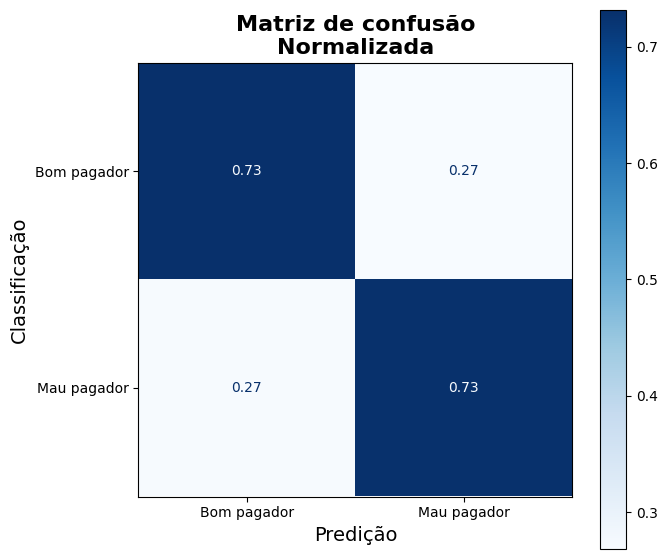


Classification Report

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      6960
           1       0.73      0.73      0.73      6960

    accuracy                           0.73     13920
   macro avg       0.73      0.73      0.73     13920
weighted avg       0.73      0.73      0.73     13920


ROC Curve



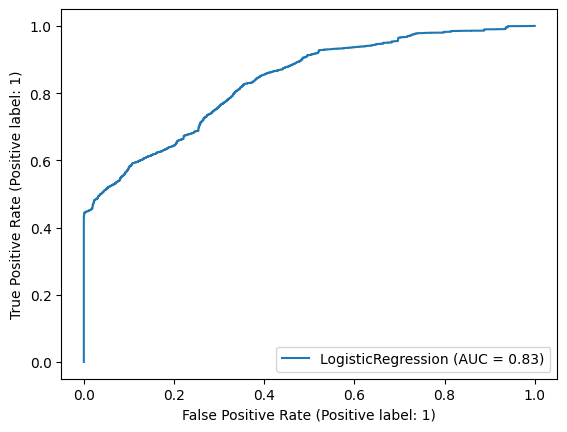

In [72]:
run_model(logistic_model, x_train, y_train, x_test, y_test)

## Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt_classifier = DecisionTreeClassifier()


-------Resultados DecisionTreeClassifier()-------

Métrica KS: KstestResult(statistic=0.9915948275862069, pvalue=0.0, statistic_location=0.3333333333333333, statistic_sign=1)


Confusion Matrix


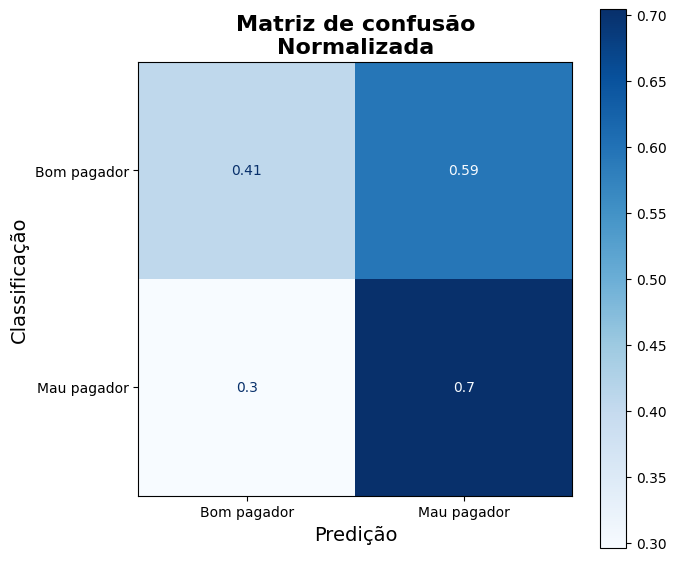


Classification Report

              precision    recall  f1-score   support

           0       0.58      0.41      0.48      6960
           1       0.54      0.70      0.61      6960

    accuracy                           0.56     13920
   macro avg       0.56      0.56      0.55     13920
weighted avg       0.56      0.56      0.55     13920


ROC Curve



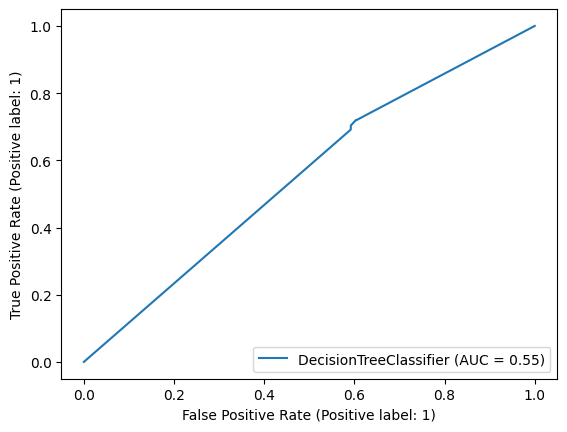

In [75]:
run_model(dt_classifier, x_train, y_train, x_test, y_test)

## GradientBoosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_xgb = GradientBoostingClassifier(random_state=SEED)


-------Resultados GradientBoostingClassifier(random_state=400)-------

Métrica KS: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=0.49983758722306937, statistic_sign=1)


Confusion Matrix


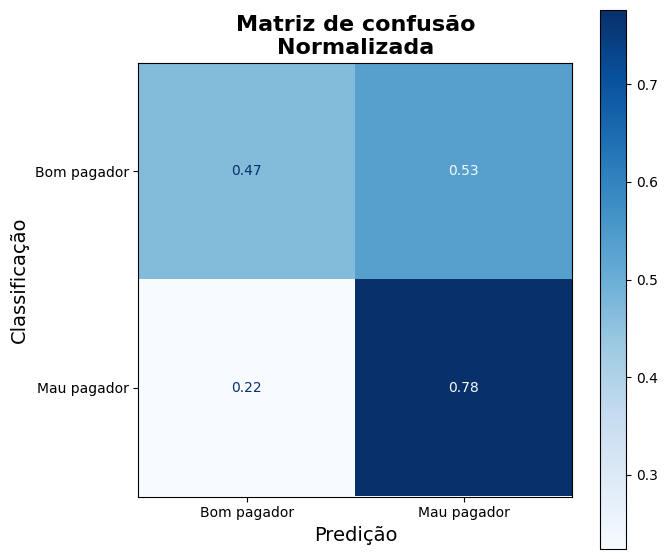


Classification Report

              precision    recall  f1-score   support

           0       0.68      0.47      0.55      6960
           1       0.59      0.78      0.67      6960

    accuracy                           0.62     13920
   macro avg       0.63      0.62      0.61     13920
weighted avg       0.63      0.62      0.61     13920


ROC Curve



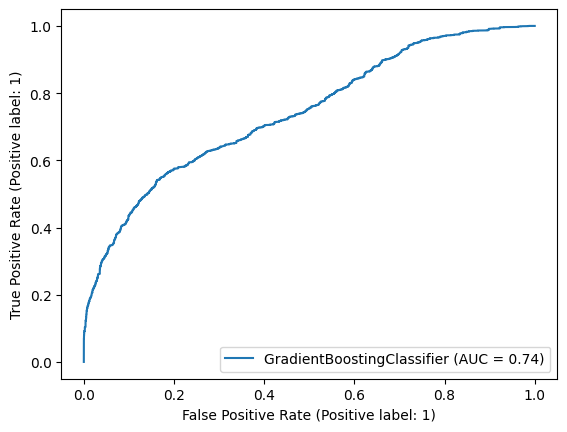

In [77]:
run_model(modelo_xgb, x_train, y_train, x_test, y_test)

In [78]:
y_train.value_counts()

Risco_de_credito
0    20880
1    20880
Name: count, dtype: int64